# Financial Transactions Data Cleaning

In [2]:
import pandas as pd
import numpy as np

## Load Data

In [3]:
data = pd.read_csv('../data/raw/dirty_financial_transactions.csv')
df = data.copy()

df.head()

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status
0,T0001,2024-08-02,C2205,Headphones,-5.0,$420.21,pay pal,NaN
1,T0002,2020-02-10,C3156,Coffee,469.0,-445.34202525395585,creditcard,Pending
2,T0003,2025-02-30,C2919,Tablet,-4.0,810.9930123946459,credit card,completed
3,T0004,2020-08-17,C3009,Tab,-7.0,868.6083413217348,PayPal,Pending
4,T0005,2025-02-30,C3488,Coffee Machine,-10.0,-763.1224490039416,PayPal,completed


## Remove Duplicates and Missing Values

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.replace(['', 'NA', 'N/A', 'null', None], np.nan, inplace=True)
df.dropna(inplace=True)

## Standardize Payment Method

In [5]:
df['Payment_Method'] = df['Payment_Method'].str.strip().str.lower().str.replace(' ', '', regex=False)
final_standard = {
    'creditcard': 'credit_card',
    'paypal': 'paypal',
    'cash': 'cash',
}
df['Payment_Method'] = df['Payment_Method'].replace(final_standard)

## Clean Price and Quantity

In [6]:
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).astype(float)
df['Price'] = np.abs(df['Price'])
df['Quantity'] = np.abs(df['Quantity'])

## Fix Product Names

In [7]:
from rapidfuzz import process
correct_names = ['Tablet', 'Laptop', 'Coffee Machine', 'Smartphone', 'Headphones']
def fix_name(name):
    match, score, _ = process.extractOne(name, correct_names)
    return match if score > 50 else name
df['Product_Name'] = df['Product_Name'].apply(fix_name)
df['Product_Name'] = df['Product_Name'].str.title()

## Standardize Transaction Status

In [8]:
df['Transaction_Status'] = df['Transaction_Status'].str.strip().str.title()

## Drop Duplicate Transaction IDs

In [10]:
df = df.drop_duplicates(subset=['Transaction_ID'], keep='first')

## Product Counts

In [11]:
product_counts = df['Product_Name'].value_counts().reset_index()
product_counts.columns = ['Product_Name', 'Count']
product_counts

,Product_Name,Count
0,Tablet,9151
1,Smartphone,8969
2,Coffee Machine,8949
3,Laptop,8938
4,Headphones,8898


## Save Cleaned Data

In [12]:
import os
output_path = '../data/processed/cleaned_financial_transactions.csv'
if os.path.exists(output_path):
    os.remove(output_path)
df.to_csv(output_path, index=False)

## Data Heads

In [13]:
data.head()

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status
0,T0001,2024-08-02,C2205,Headphones,-5.0,$420.21,pay pal,NaN
1,T0002,2020-02-10,C3156,Coffee,469.0,-445.34202525395585,creditcard,Pending
2,T0003,2025-02-30,C2919,Tablet,-4.0,810.9930123946459,credit card,completed
3,T0004,2020-08-17,C3009,Tab,-7.0,868.6083413217348,PayPal,Pending
4,T0005,2025-02-30,C3488,Coffee Machine,-10.0,-763.1224490039416,PayPal,completed


In [14]:
df.head()


,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status
1,T0002,2020-02-10,C3156,Coffee Machine,469.0,445.342025,credit_card,Pending
2,T0003,2025-02-30,C2919,Tablet,4.0,810.993012,credit_card,Completed
3,T0004,2020-08-17,C3009,Tablet,7.0,868.608341,paypal,Pending
4,T0005,2025-02-30,C3488,Coffee Machine,10.0,763.122449,paypal,Completed
9,T0010,2025-02-30,C2846,Laptop,1.0,404.890707,credit_card,Pending


In [15]:
df.corr(numeric_only=True)

,Quantity,Price
Quantity,1.000000,-0.003319
Price,-0.003319,1.000000


## Visuals

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1 Histograms for Price and Quantity

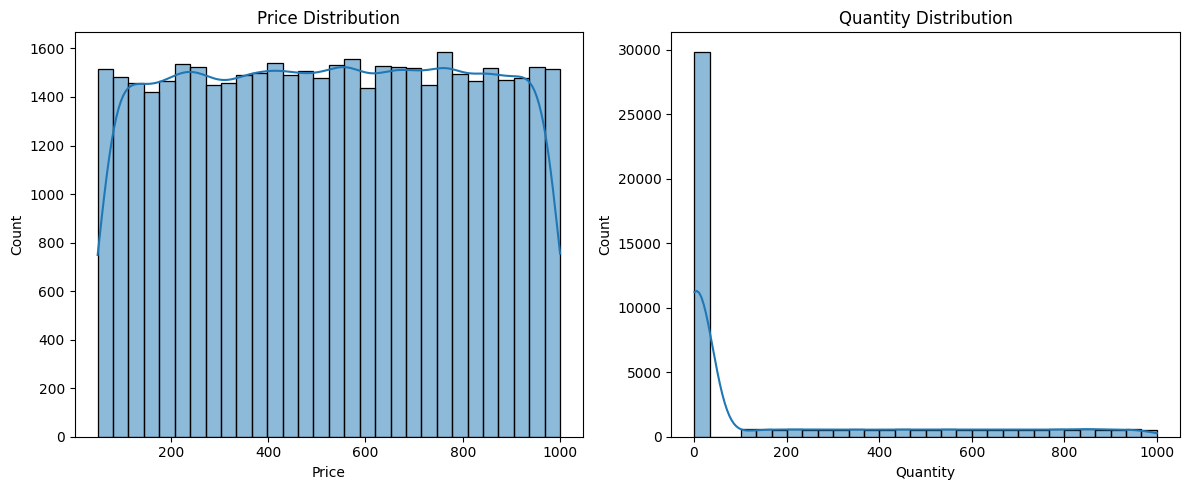

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.subplot(1,2,2)
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.tight_layout()
plt.show()

### 2 Bar plots for Product_Name and Payment_Method

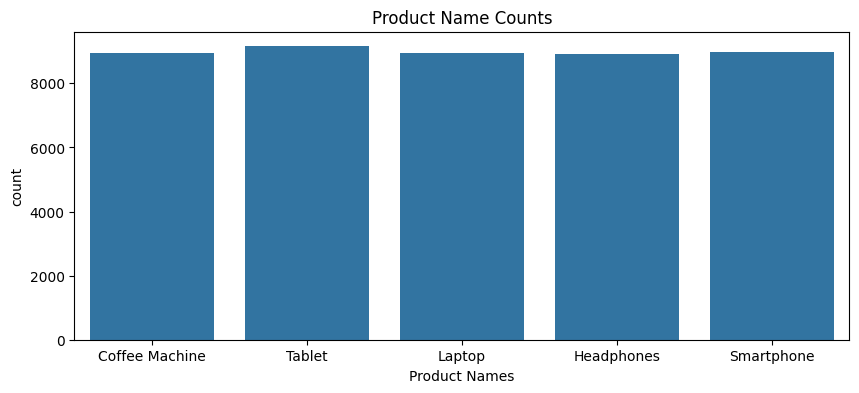

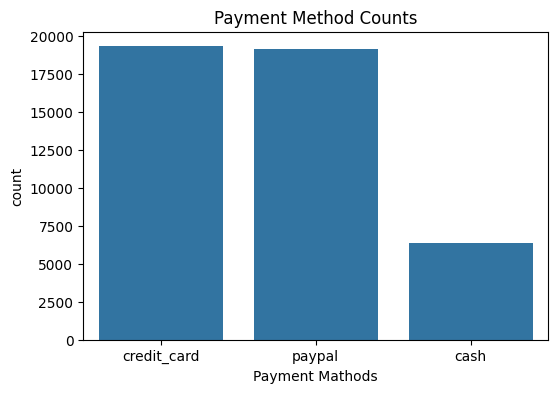

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x='Product_Name', data=df)
plt.title('Product Name Counts')
plt.xlabel("Product Names")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Payment_Method', data=df)
plt.title('Payment Method Counts')
plt.xlabel('Payment Mathods')
plt.show()

### 3 Box plots for outliers

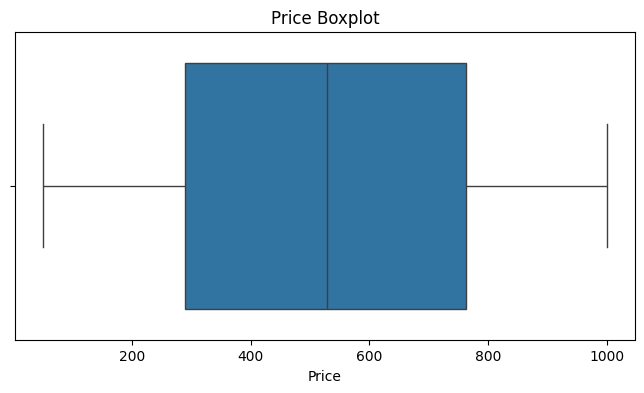

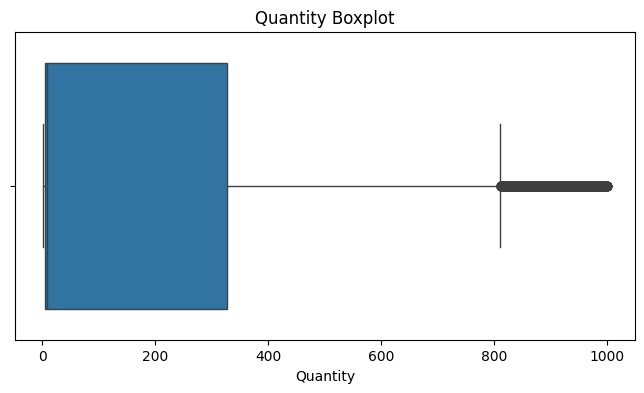

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Boxplot')
plt.show()

### 4 Scatter plot for Price vs. Quantity

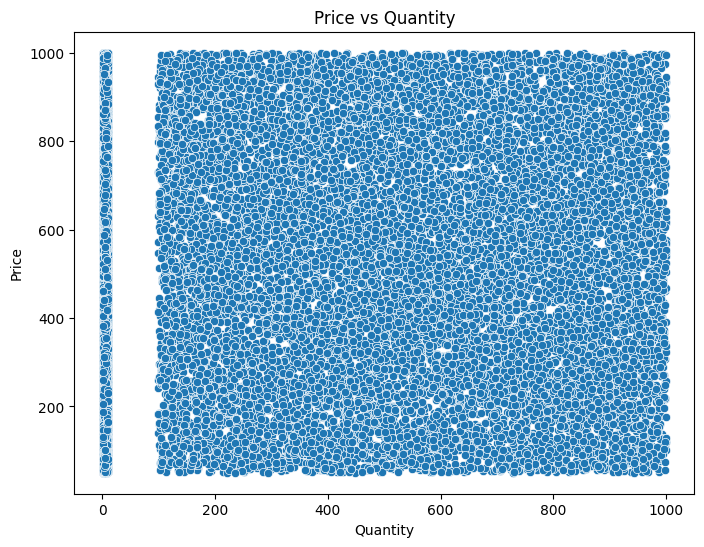

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Quantity', y='Price', data=df)
plt.title('Price vs Quantity')
plt.show()